In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
import math
from matplotlib.colors import TwoSlopeNorm
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm


In [6]:
ineff = pd.read_csv('D:\lbl23Fall\BPA git for push\cost_table_for_viz\ineff.json.csv')
mid = pd.read_csv('D:\lbl23Fall\BPA git for push\cost_table_for_viz\mid.json.csv')
stated = pd.read_csv('D:\lbl23Fall\BPA git for push\cost_table_for_viz\stated.json.csv')
high = pd.read_csv('D:\lbl23Fall\BPA git for push\cost_table_for_viz\high.json.csv')
breakthrough = pd.read_csv(r'D:\lbl23Fall\BPA git for push\cost_table_for_viz\breakthrough.json.csv')

In [171]:
ineff['scenario'] = 'ineff'
mid['scenario'] = 'mid'
stated['scenario'] = 'stated'
high['scenario'] = 'high'
breakthrough['scenario'] = 'breakthrough'

cost_all_scenario = pd.concat([ineff, mid, stated, high, breakthrough], ignore_index=True)

# Annual plots

## Total cost

In [280]:
filtered = cost_all_scenario[
    cost_all_scenario['metric'].isin(['Efficient Energy Cost (USD)'])
]
ref_case = ineff[ineff['metric'].isin(['Baseline Energy Cost (USD)'])]
ref_case['scenario'] = 'ref'
combined_df = pd.concat([filtered, ref_case], ignore_index=True)

grouped = (
    combined_df.groupby(['year', 'scenario'])['value']
    .sum()
    .reset_index()
)

# Pivot for easier plotting
pivot = grouped.pivot_table(index='year', columns=['scenario'], values='value')
pivot = pivot/1e9
pivot.head(2)

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\844553103.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_case['scenario'] = 'ref'


scenario  breakthrough        high       ineff         mid         ref  \
year                                                                     
2024        531.060855  531.120732  533.761708  531.517422  532.744045   
2025        510.763614  510.860443  516.341540  511.696893  514.056148   

scenario      stated  
year                  
2024      532.089995  
2025      512.829633

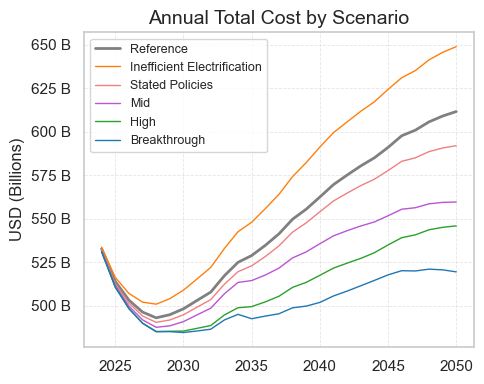

In [281]:
# Define fixed colors for each scenario
scenario_colors = {
    'ref':'grey',
    'ineff': 'tab:orange',
    'stated': 'lightcoral',
    'mid': 'mediumorchid',
    'high': 'tab:green',
    'breakthrough': 'tab:blue'
}
scenario_labels = {
    'ref': 'Reference',
    'stated': 'Stated Policies',
    'mid': 'Mid',
    'high': 'High',
    'breakthrough': 'Breakthrough',
    'ineff': 'Inefficient Electrification'
}
pivot = pivot.reindex(columns=list(scenario_colors.keys()))

fig, ax = plt.subplots(figsize=(5, 4))

for scenario in pivot.columns:    
    color = scenario_colors[scenario]
    linewidth = 2 if scenario.lower() in ['ref', 'reference'] else 1
    ax.plot(
        pivot.index,
        pivot[scenario],
        label=scenario_labels.get(scenario, scenario),
        linestyle=linestyle,
        color=color,
        linewidth=linewidth
    )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', fontsize=9)
# Format y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f} B'))

# Custom x-ticks
ax.grid(visible=True, linestyle='--', linewidth=0.6, alpha=0.5)
ax.set_xticks([y for y in pivot.index if y % 5 == 0 and y >= 2025])


ax.set_ylabel("USD (Billions)", fontsize=12)
title = "Annual Total Cost by Scenario"
ax.set_title(title, fontsize=14)
ax.legend(title='', fontsize=9)

plt.tight_layout()
plt.savefig(f'cost_graph/{title}.png',transparent=True,bbox_inches='tight')

## Total cost savings

In [107]:
ineff['metric'].unique()

array(['Baseline Energy Cost (USD)', 'Efficient Energy Cost (USD)',
       'Energy Cost Savings (USD)'], dtype=object)

In [109]:
filtered = cost_all_scenario[
    cost_all_scenario['metric'].isin(['Energy Cost Savings (USD)'])
]
# combined_df = pd.concat([filtered, ref_case], ignore_index=True)

grouped = (
    filtered.groupby(['year', 'scenario'])['value']
    .sum()
    .reset_index()
)

# Pivot for easier plotting
pivot = grouped.pivot_table(index='year', columns=['scenario'], values='value')
pivot = pivot/1e9
pivot.head(2)

scenario  breakthrough      high     ineff       mid    stated
year                                                          
2024          1.683190  1.623313 -1.017663  1.282018  0.759763
2025          3.292534  3.195705 -2.285393  2.479637  1.456681

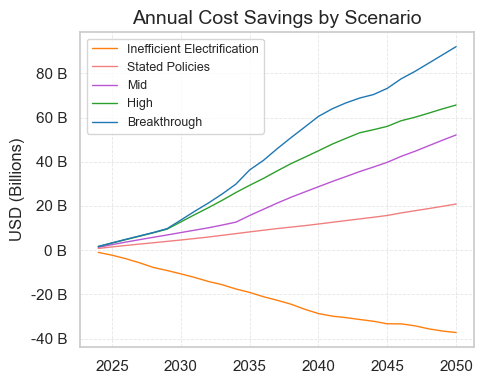

In [111]:
# Define fixed colors for each scenario
scenario_colors = {
    # 'ref':'grey',
    'ineff': 'tab:orange',
    'stated': 'lightcoral',
    'mid': 'mediumorchid',
    'high': 'tab:green',
    'breakthrough': 'tab:blue'
}
scenario_labels = {
    # 'ref': 'Reference',
    'stated': 'Stated Policies',
    'mid': 'Mid',
    'high': 'High',
    'breakthrough': 'Breakthrough',
    'ineff': 'Inefficient Electrification'
}
pivot = pivot.reindex(columns=list(scenario_colors.keys()))

fig, ax = plt.subplots(figsize=(5, 4))

for scenario in pivot.columns:    
    color = scenario_colors[scenario]
    linewidth = 2 if scenario.lower() in ['ref', 'reference'] else 1
    ax.plot(
        pivot.index,
        pivot[scenario],
        label=scenario_labels.get(scenario, scenario),
        linestyle=linestyle,
        color=color,
        linewidth=linewidth
    )
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', fontsize=9)
# Format y-axis
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f} B'))

# Custom x-ticks
ax.grid(visible=True, linestyle='--', linewidth=0.6, alpha=0.5)
ax.set_xticks([y for y in pivot.index if y % 5 == 0 and y >= 2025])


ax.set_ylabel("USD (Billions)", fontsize=12)
title = "Annual Cost Savings by Scenario"
ax.set_title(title, fontsize=14)
ax.legend(title='', fontsize=9)

plt.tight_layout()
plt.savefig(f'cost_graph/{title}.png',transparent=True,bbox_inches='tight')

## Sector scenarios

In [124]:
scenarios

['breakthrough', 'high', 'ineff', 'mid', 'ref', 'stated']

In [117]:
combined_df['end_use'].unique()

array(['Other', 'Heating (Equip.)', 'Cooling (Equip.)', 'Water Heating',
       'Cooking', 'Refrigeration', 'Ventilation',
       'Computers and Electronics', 'Lighting'], dtype=object)

In [282]:
# Group bldg_type → sector
combined_df['sector'] = combined_df['bldg_type'].str.extract(r'(Residential|Commercial)')

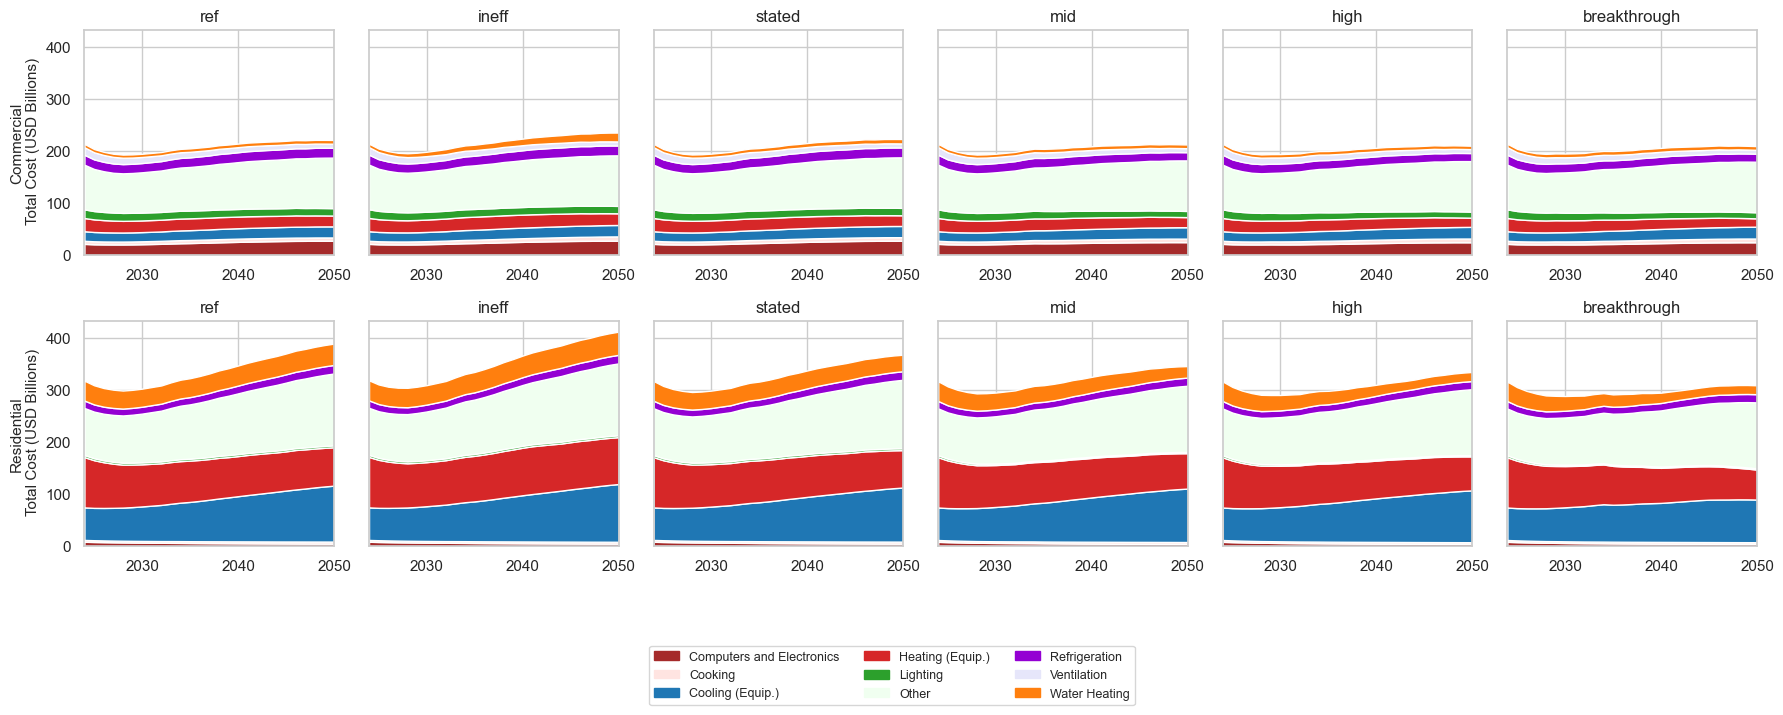

In [133]:


# Aggregate
agg = combined_df.groupby(['scenario', 'sector', 'year', 'end_use'])['value'].sum().reset_index()

# Get unique values
scenario_order = ['ref', 'ineff', 'stated', 'mid', 'high', 'breakthrough']

# Filter to include only existing scenarios from the data
scenarios = [s for s in scenario_order if s in agg['scenario'].unique()]
sectors = ['Commercial', 'Residential']
end_uses = sorted(agg['end_use'].unique())
end_use_colors = {
    'Computers and Electronics': 'brown',
    'Cooking': 'mistyrose',
    'Cooling (Equip.)': 'tab:blue',
    'Heating (Equip.)': 'tab:red',
    'Lighting': 'tab:green',
    'Other': 'honeydew',
    'Refrigeration': 'darkviolet',
    'Ventilation': 'lavender',
    'Water Heating': 'tab:orange'
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(scenarios), figsize=(3*len(scenarios), 6), sharey=True)

# Plot
for i, sector in enumerate(sectors):
    for j, scenario in enumerate(scenarios):
        ax = axes[i][j] if len(scenarios) > 1 else axes[i]

        # Filter and pivot
        data = agg[(agg['sector'] == sector) & (agg['scenario'] == scenario)]
        pivot = data.pivot(index='year', columns='end_use', values='value').fillna(0)

        # Reorder columns to match color assignment
        pivot = pivot[[eu for eu in end_uses if eu in pivot.columns]]

        # Plot stacked area
        ax.stackplot(pivot.index, pivot.T, labels=pivot.columns, colors=[end_use_colors[eu] for eu in pivot.columns])

        ax.set_title(scenario, fontsize=12)
        if j == 0:
            ax.set_ylabel(f"{sector}\n Total Cost (USD Billions)", fontsize=11)
        else:
            ax.set_yticklabels([])

        ax.set_xlim(pivot.index.min(), pivot.index.max())
        ax.set_xticks([2030, 2040, 2050])
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:,.0f}'))


# Legend
handles = [plt.Rectangle((0, 0), 1, 1, color=end_use_colors[eu]) for eu in end_uses if eu in end_use_colors]
labels = [eu for eu in end_uses if eu in end_use_colors]
fig.legend(
    handles, end_uses,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.08),  # Adjust as needed
    ncol=3, fontsize=9
)
title = 'Annual Total Cost by Scenarios and Sectors'
plt.tight_layout()
plt.savefig(f'cost_graph/{title}_sector_scenario.png', transparent=True, bbox_inches='tight')


## Sector scenarios - Heating / Cooling / Non mechanics

In [283]:
measure_map = pd.read_csv('map_meas/measure_map.tsv', sep='\t')
combined_df = combined_df.merge(
    measure_map[['meas', 'measure_desc_simple']],
    on='meas',
    how='left'
)
combined_df.head(2)

meas            adoption_scn  \
0  (R) Ref. Case Gas Dryer  Max adoption potential   
1  (R) Ref. Case Gas Dryer  Max adoption potential   

                        metric reg          bldg_type end_use          fuel  \
0  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   
1  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   

   year         value scenario       sector measure_desc_simple  
0  2024  16467.406179    ineff  Residential       Dryer, fossil  
1  2025  32782.057045    ineff  Residential       Dryer, fossil

In [284]:
measure_map.head(2)

meas              Scout_end_use     original_ann  \
0    (C) 90.1 Lighting                   Lighting  com_light_ann_1   
1  (C) 90.1 Plug Loads  Computers and Electronics   com_misc_ann_1   

       measure_ann     original_ts      measure_ts sector  \
0  com_light_ann_1  com_light_ts_1  com_light_ts_1    com   
1   com_misc_ann_1   com_misc_ts_1   com_misc_ts_1    com   

               original_desc                     measure_desc  \
0                   Lighting                   Lighting, 90.1   
1  Computers and electronics  Computers and electronics, 90.1   

        original_desc_simple        measure_desc_simple  
0                   Lighting             Lighting, 90.1  
1  Computers and electronics  Computers and electronics

In [285]:
def plot_enduses(combined_df, title):
    # Aggregate
    agg = combined_df.groupby(['scenario', 'sector', 'year','measure_desc_simple'])['value'].sum().reset_index()
    
    # Get unique values
    scenario_order = ['ref', 'ineff', 'stated', 'mid', 'high', 'breakthrough']
    
    # Filter to include only existing scenarios from the data
    scenarios = [s for s in scenario_order if s in agg['scenario'].unique()]
    sectors = ['Commercial', 'Residential']
    measures = sorted(agg['measure_desc_simple'].unique())
    # end_use_colors = {
    #     'Computers and Electronics': 'brown',
    #     'Cooking': 'mistyrose',
    #     'Cooling (Equip.)': 'tab:blue',
    #     'Heating (Equip.)': 'tab:red',
    #     'Lighting': 'tab:green',
    #     'Other': 'honeydew',
    #     'Refrigeration': 'darkviolet',
    #     'Ventilation': 'lavender',
    #     'Water Heating': 'tab:orange'
    # }
    cmap = cm.get_cmap('Set1', len(measures))
    meas_colors = {m: mcolors.to_hex(cmap(i)) for i, m in enumerate(measures)}
    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=len(scenarios), figsize=(3*len(scenarios), 6), sharey=True)
    
    for i, sector in enumerate(sectors):
        for j, scenario in enumerate(scenarios):
            ax = axes[i][j] if len(scenarios) > 1 else axes[i]

            data = agg[(agg['sector'] == sector) & (agg['scenario'] == scenario)]
            pivot = data.pivot(index='year', columns='measure_desc_simple', values='value').fillna(0)
            pivot = pivot[[m for m in measures if m in pivot.columns]]

            ax.stackplot(pivot.index, pivot.T, labels=pivot.columns, colors=[meas_colors[m] for m in pivot.columns])

            ax.set_title(scenario, fontsize=12)
            if j == 0:
                ax.set_ylabel(f"{sector}\nTotal Cost (USD Billions)", fontsize=11)
            else:
                ax.set_yticklabels([])

            ax.set_xlim(pivot.index.min(), pivot.index.max())
            ax.set_xticks([2030, 2040, 2050])
            ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e9:,.0f}'))

    
    
    # Legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=meas_colors[m]) for m in measures]
    fig.legend(
        handles, measures,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.08),
        ncol=3, fontsize=9
    )
    fig.suptitle(f"Total Cost by Measure for {title}", fontsize=16, y=1)
    plt.tight_layout()
    plt.savefig(f'cost_graph/total_cost_{title}_sector_scenario.png', transparent=True, bbox_inches='tight')

In [170]:
combined_df.head(2)

meas            adoption_scn  \
0  (R) Ref. Case Gas Dryer  Max adoption potential   
1  (R) Ref. Case Gas Dryer  Max adoption potential   

                        metric reg          bldg_type end_use          fuel  \
0  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   
1  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   

   year         value scenario measure_desc_simple  
0  2024  16467.406179    ineff       Dryer, fossil  
1  2025  32782.057045    ineff       Dryer, fossil

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3005769342.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


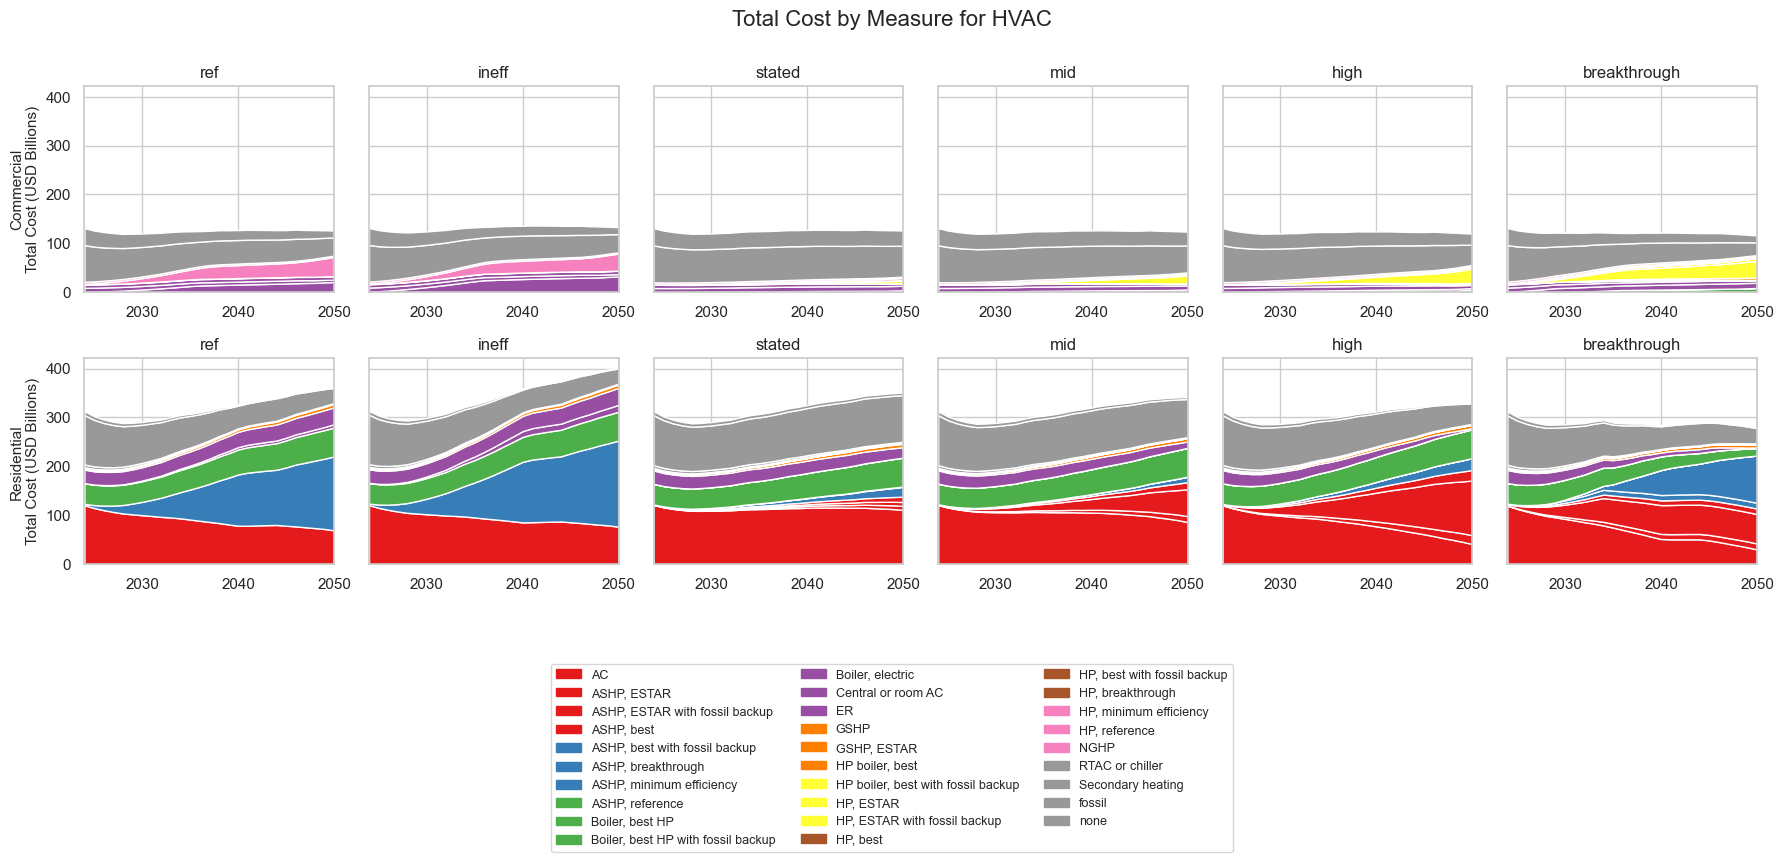

In [183]:
combined_df_hvac = combined_df[combined_df['end_use'].isin(['Heating (Equip.)', 'Cooling (Equip.)'])]
plot_enduses(combined_df_hvac, 'HVAC')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3005769342.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


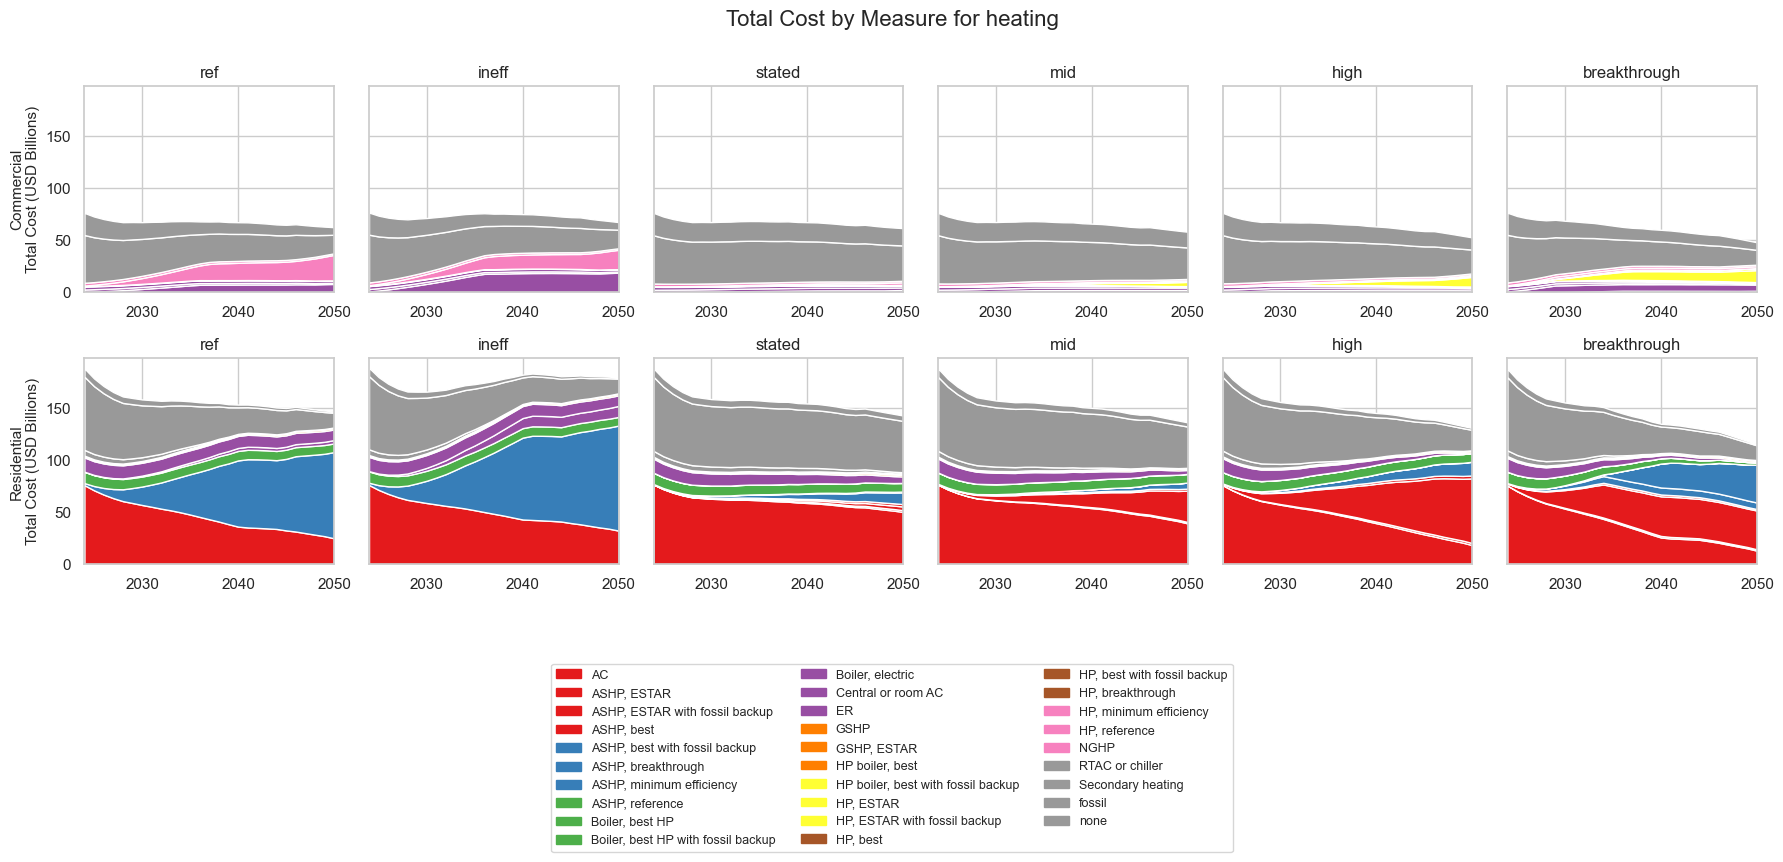

In [286]:
combined_df_heating = combined_df[combined_df['end_use'].isin(['Heating (Equip.)'])]
plot_enduses(combined_df_heating, 'heating')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3005769342.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


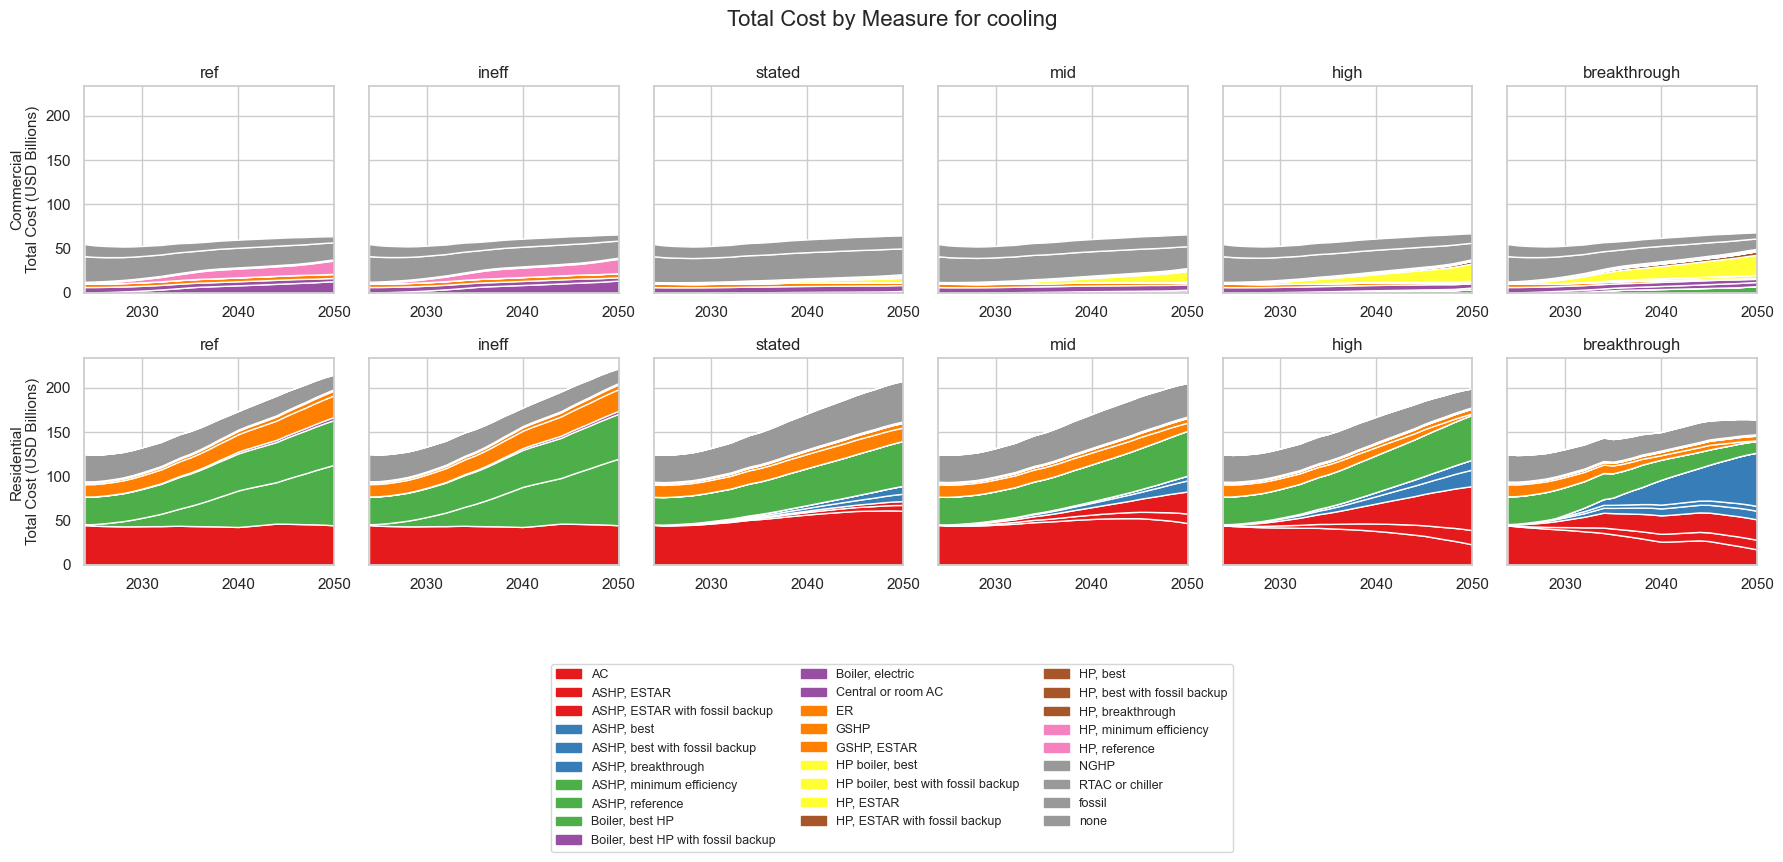

In [287]:
combined_df_cooling = combined_df[combined_df['end_use'].isin(['Cooling (Equip.)'])]
plot_enduses(combined_df_cooling, 'cooling')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3005769342.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


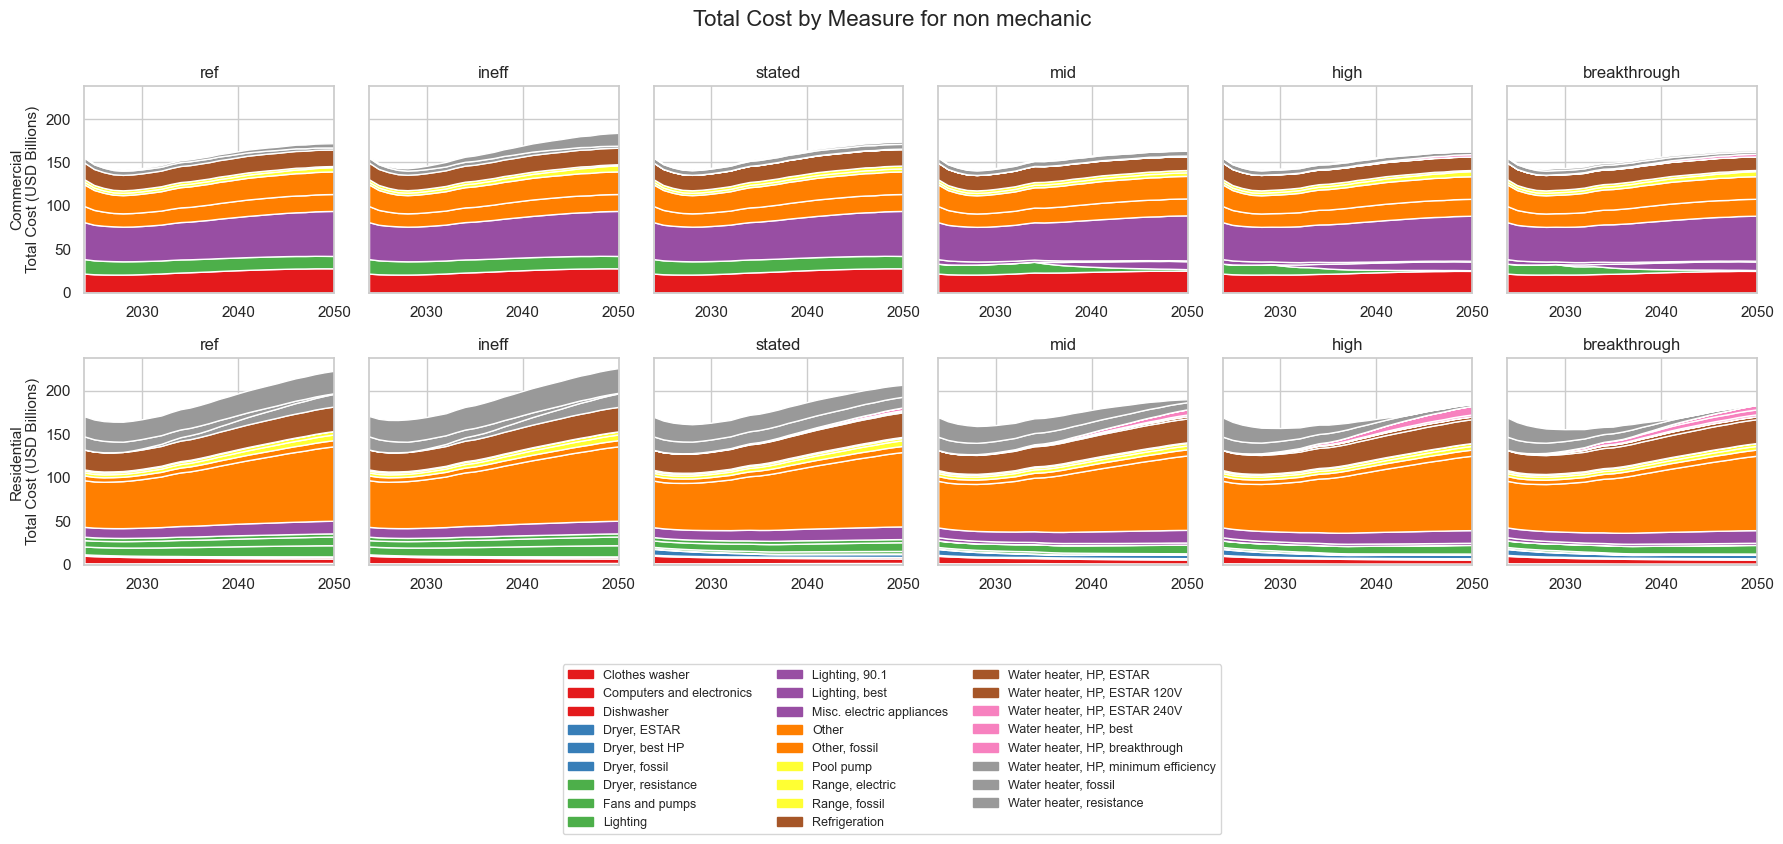

In [180]:
combined_df_non_mechanic = combined_df[~combined_df['end_use'].isin(['Heating (Equip.)', 'Cooling (Equip.)', 'Ventilation'])]
plot_enduses(combined_df_non_mechanic, 'non mechanic')

# Spatial mapping

In [198]:
us_states = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
us_states.columns = ['name', 'reg']

In [247]:
# Define the custom colormap
yellow_white_green = LinearSegmentedColormap.from_list(
    'yellow_white_green',
    ['tab:red', 'white', 'tab:green']
)

In [199]:
combined_df.head(2)

meas            adoption_scn  \
0  (R) Ref. Case Gas Dryer  Max adoption potential   
1  (R) Ref. Case Gas Dryer  Max adoption potential   

                        metric reg          bldg_type end_use          fuel  \
0  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   
1  Efficient Energy Cost (USD)  AL  Residential (New)   Other  Non-Electric   

   year         value scenario       sector measure_desc_simple  
0  2024  16467.406179    ineff  Residential       Dryer, fossil  
1  2025  32782.057045    ineff  Residential       Dryer, fossil

In [250]:
def generate_map(combined_df, title):
    state_cost = combined_df.groupby(['scenario', 'reg'])['value'].sum().reset_index()
    # Merge full state names into cost data
    state_cost = state_cost.merge(us_states, on='reg', how='left')
    
    # Step 3: Merge with geometry
    state_map = gpd.read_file("map_meas/us-states.json")
    state_map = state_map.rename(columns={'name': 'name'})  # ensure column match
    
    # Merge cost with geometry
    merged = state_map.merge(state_cost, on='name')
    
    # Step 4: Plot
    scenarios = ['ref', 'ineff', 'stated', 'mid', 'high', 'breakthrough']
    n = len(scenarios)
    cols = 3
    rows = math.ceil(n / cols)
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5*cols, 4*rows))
    axes = axes.flatten()  # to index easily even with 1 row
    merged['value_billion'] = merged['value'] / 1e9
    vmin = merged['value_billion'].min()
    vmax = merged['value_billion'].max()
    vcenter = 0  # Center the colormap at zero
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    if 'saving' in title.lower():
        cmap = 'summer_r'
        label = 'Total Cost Savings (Billion USD)'
    else:
        cmap = 'OrRd'
        label = 'Total Cost (Billion USD)'
    for i, scenario in enumerate(scenarios):
        ax = axes[i]  # use flattened axes
    
        data = merged[merged['scenario'] == scenario].copy()
        if data.empty:
            ax.axis('off')
            ax.set_title(f"{scenario.capitalize()} (No data)", fontsize=10, color='gray')
            continue
        data['value_billion'] = data['value'] / 1e9
    
        data.plot(
            column='value_billion',
            norm=norm,
            cmap=yellow_white_green,
            linewidth=0.5,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            legend_kwds={
                'label': label,
                'shrink': 0.6
            },
            vmin=vmin,
            vmax=vmax
        )
    
        ax.set_title(scenario.capitalize(), fontsize=12)
        ax.axis('off')

    
    plt.suptitle(f'Total Cost by Scenario for {title}', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'cost_graph/total_cost_{title}_map.png', transparent=True, bbox_inches='tight')

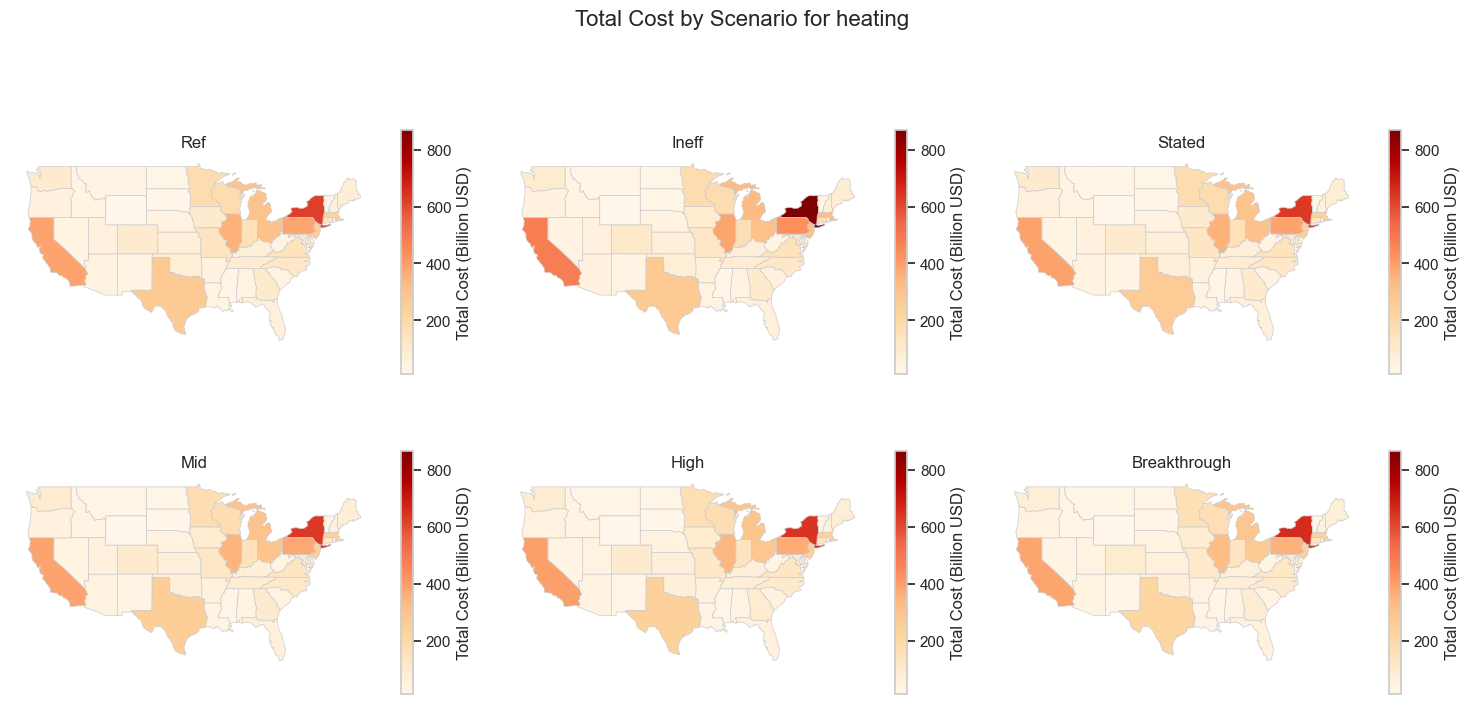

In [229]:
combined_df_heating = combined_df[combined_df['end_use'].isin(['Heating (Equip.)'])]
generate_map(combined_df_heating, 'heating')

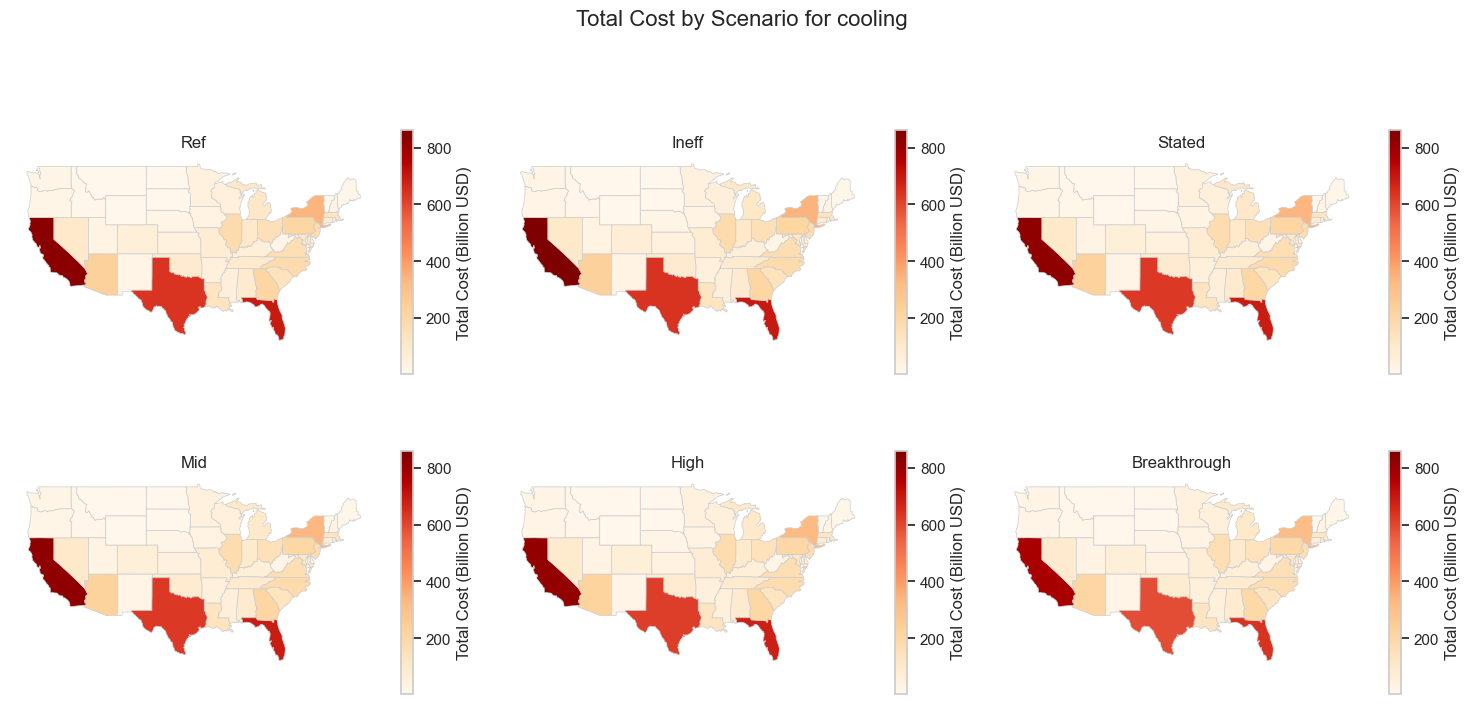

In [230]:
combined_df_cooling = combined_df[combined_df['end_use'].isin(['Cooling (Equip.)'])]
generate_map(combined_df_cooling, 'cooling')

In [216]:
savings_df = cost_all_scenario[
    cost_all_scenario['metric'].isin(['Energy Cost Savings (USD)'])
]

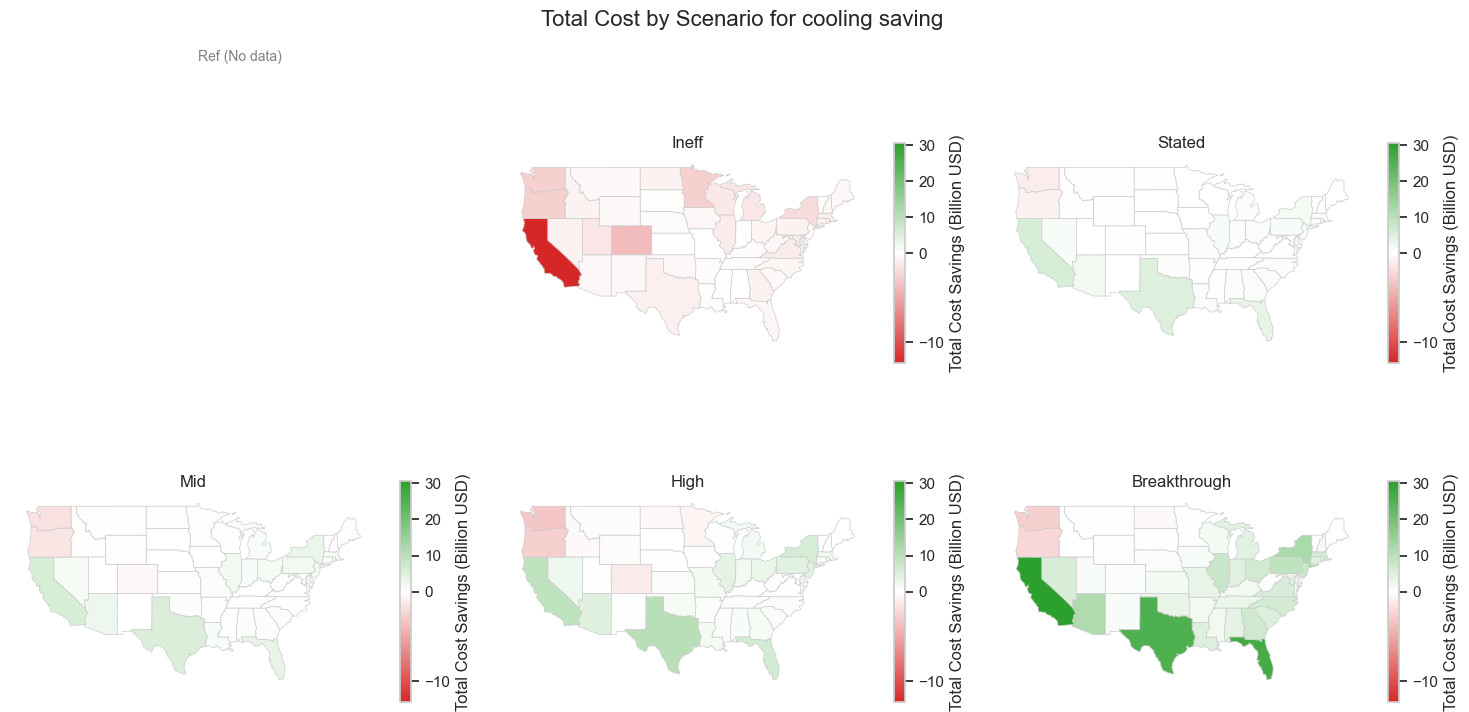

In [251]:
combined_df_cooling_saving = savings_df[savings_df['end_use'].isin(['Cooling (Equip.)'])]
generate_map(combined_df_cooling_saving, 'cooling saving')

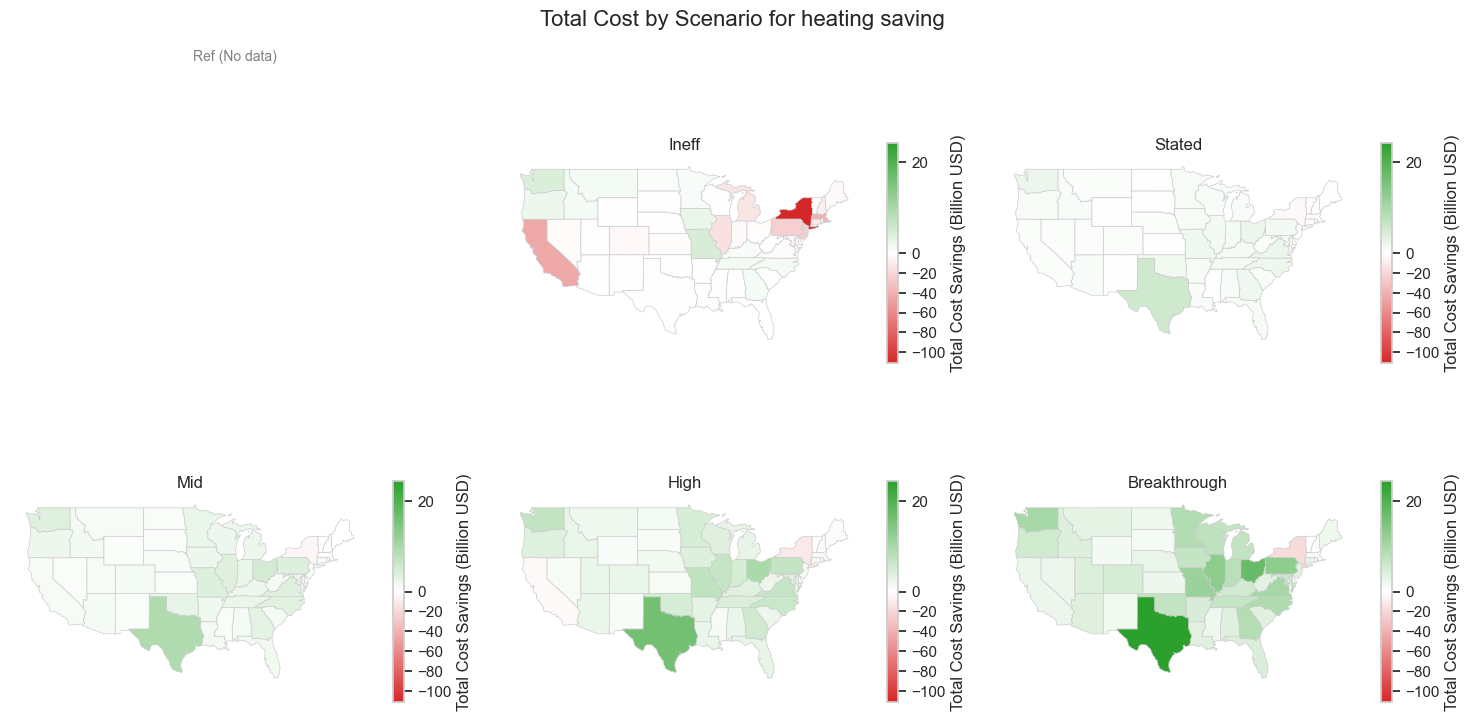

In [252]:
combined_df_heating_saving = savings_df[savings_df['end_use'].isin(['Heating (Equip.)'])]
generate_map(combined_df_heating_saving, 'heating saving')

# State

In [276]:
def plot_enduses_by_states( combined_df, selected_states, title):
    df_filtered = combined_df[combined_df['reg'].isin(selected_states)].copy()

    # Simplify to 'Residential' or 'Commercial'
    df_filtered['sector'] = df_filtered['bldg_type'].str.extract(r'(Residential|Commercial)')

    # Aggregate by state
    agg = df_filtered.groupby(['reg', 'scenario', 'year', 'measure_desc_simple'])['value'].sum().reset_index()

    # Scenario and measure order
    scenario_order = ['ref', 'ineff', 'stated', 'mid', 'high', 'breakthrough']
    scenarios = [s for s in scenario_order if s in agg['scenario'].unique()]
    measures = sorted(agg['measure_desc_simple'].unique())

    # Assign colors
    cmap = cm.get_cmap('Set1', len(measures))
    meas_colors = {m: mcolors.to_hex(cmap(i)) for i, m in enumerate(measures)}

    # Plot: rows = states, cols = scenarios
    fig, axes = plt.subplots(nrows=len(selected_states), ncols=len(scenarios), figsize=(4*len(scenarios), 3*len(selected_states)), sharex=True)

    for i, state in enumerate(selected_states):
        for j, scenario in enumerate(scenarios):
            ax = axes[i][j] if len(scenarios) > 1 else axes[i]

            data = agg[(agg['reg'] == state) & (agg['scenario'] == scenario)]
            pivot = data.pivot(index='year', columns='measure_desc_simple', values='value').fillna(0)
            pivot = pivot[[m for m in measures if m in pivot.columns]]

            ax.stackplot(pivot.index, pivot.T, labels=pivot.columns, colors=[meas_colors[m] for m in pivot.columns])
            ax.set_xlim(pivot.index.min(), pivot.index.max())
            ax.set_xticks([2030, 2040, 2050])
            ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x / 1e6:,.0f}'))

            if j == 0:
                ax.set_ylabel(state, fontsize=12)
            else:
                ax.set_yticklabels([])

            if i == 0:
                ax.set_title(scenario.capitalize(), fontsize=12)

    # Legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=meas_colors[m]) for m in measures]
    fig.legend(
        handles, measures,
        loc='upper center',
        bbox_to_anchor=(0.5, 0),
        ncol=3, fontsize=9
    )
    fig.suptitle(f"Technology Composition by State – {title}", fontsize=16, y=1.02)
    plt.tight_layout(rect=[0, 0, 0.88, 1])
    plt.savefig(f'cost_graph/tech_composition_{title}_by_state.png', transparent=True, bbox_inches='tight')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\303169120.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


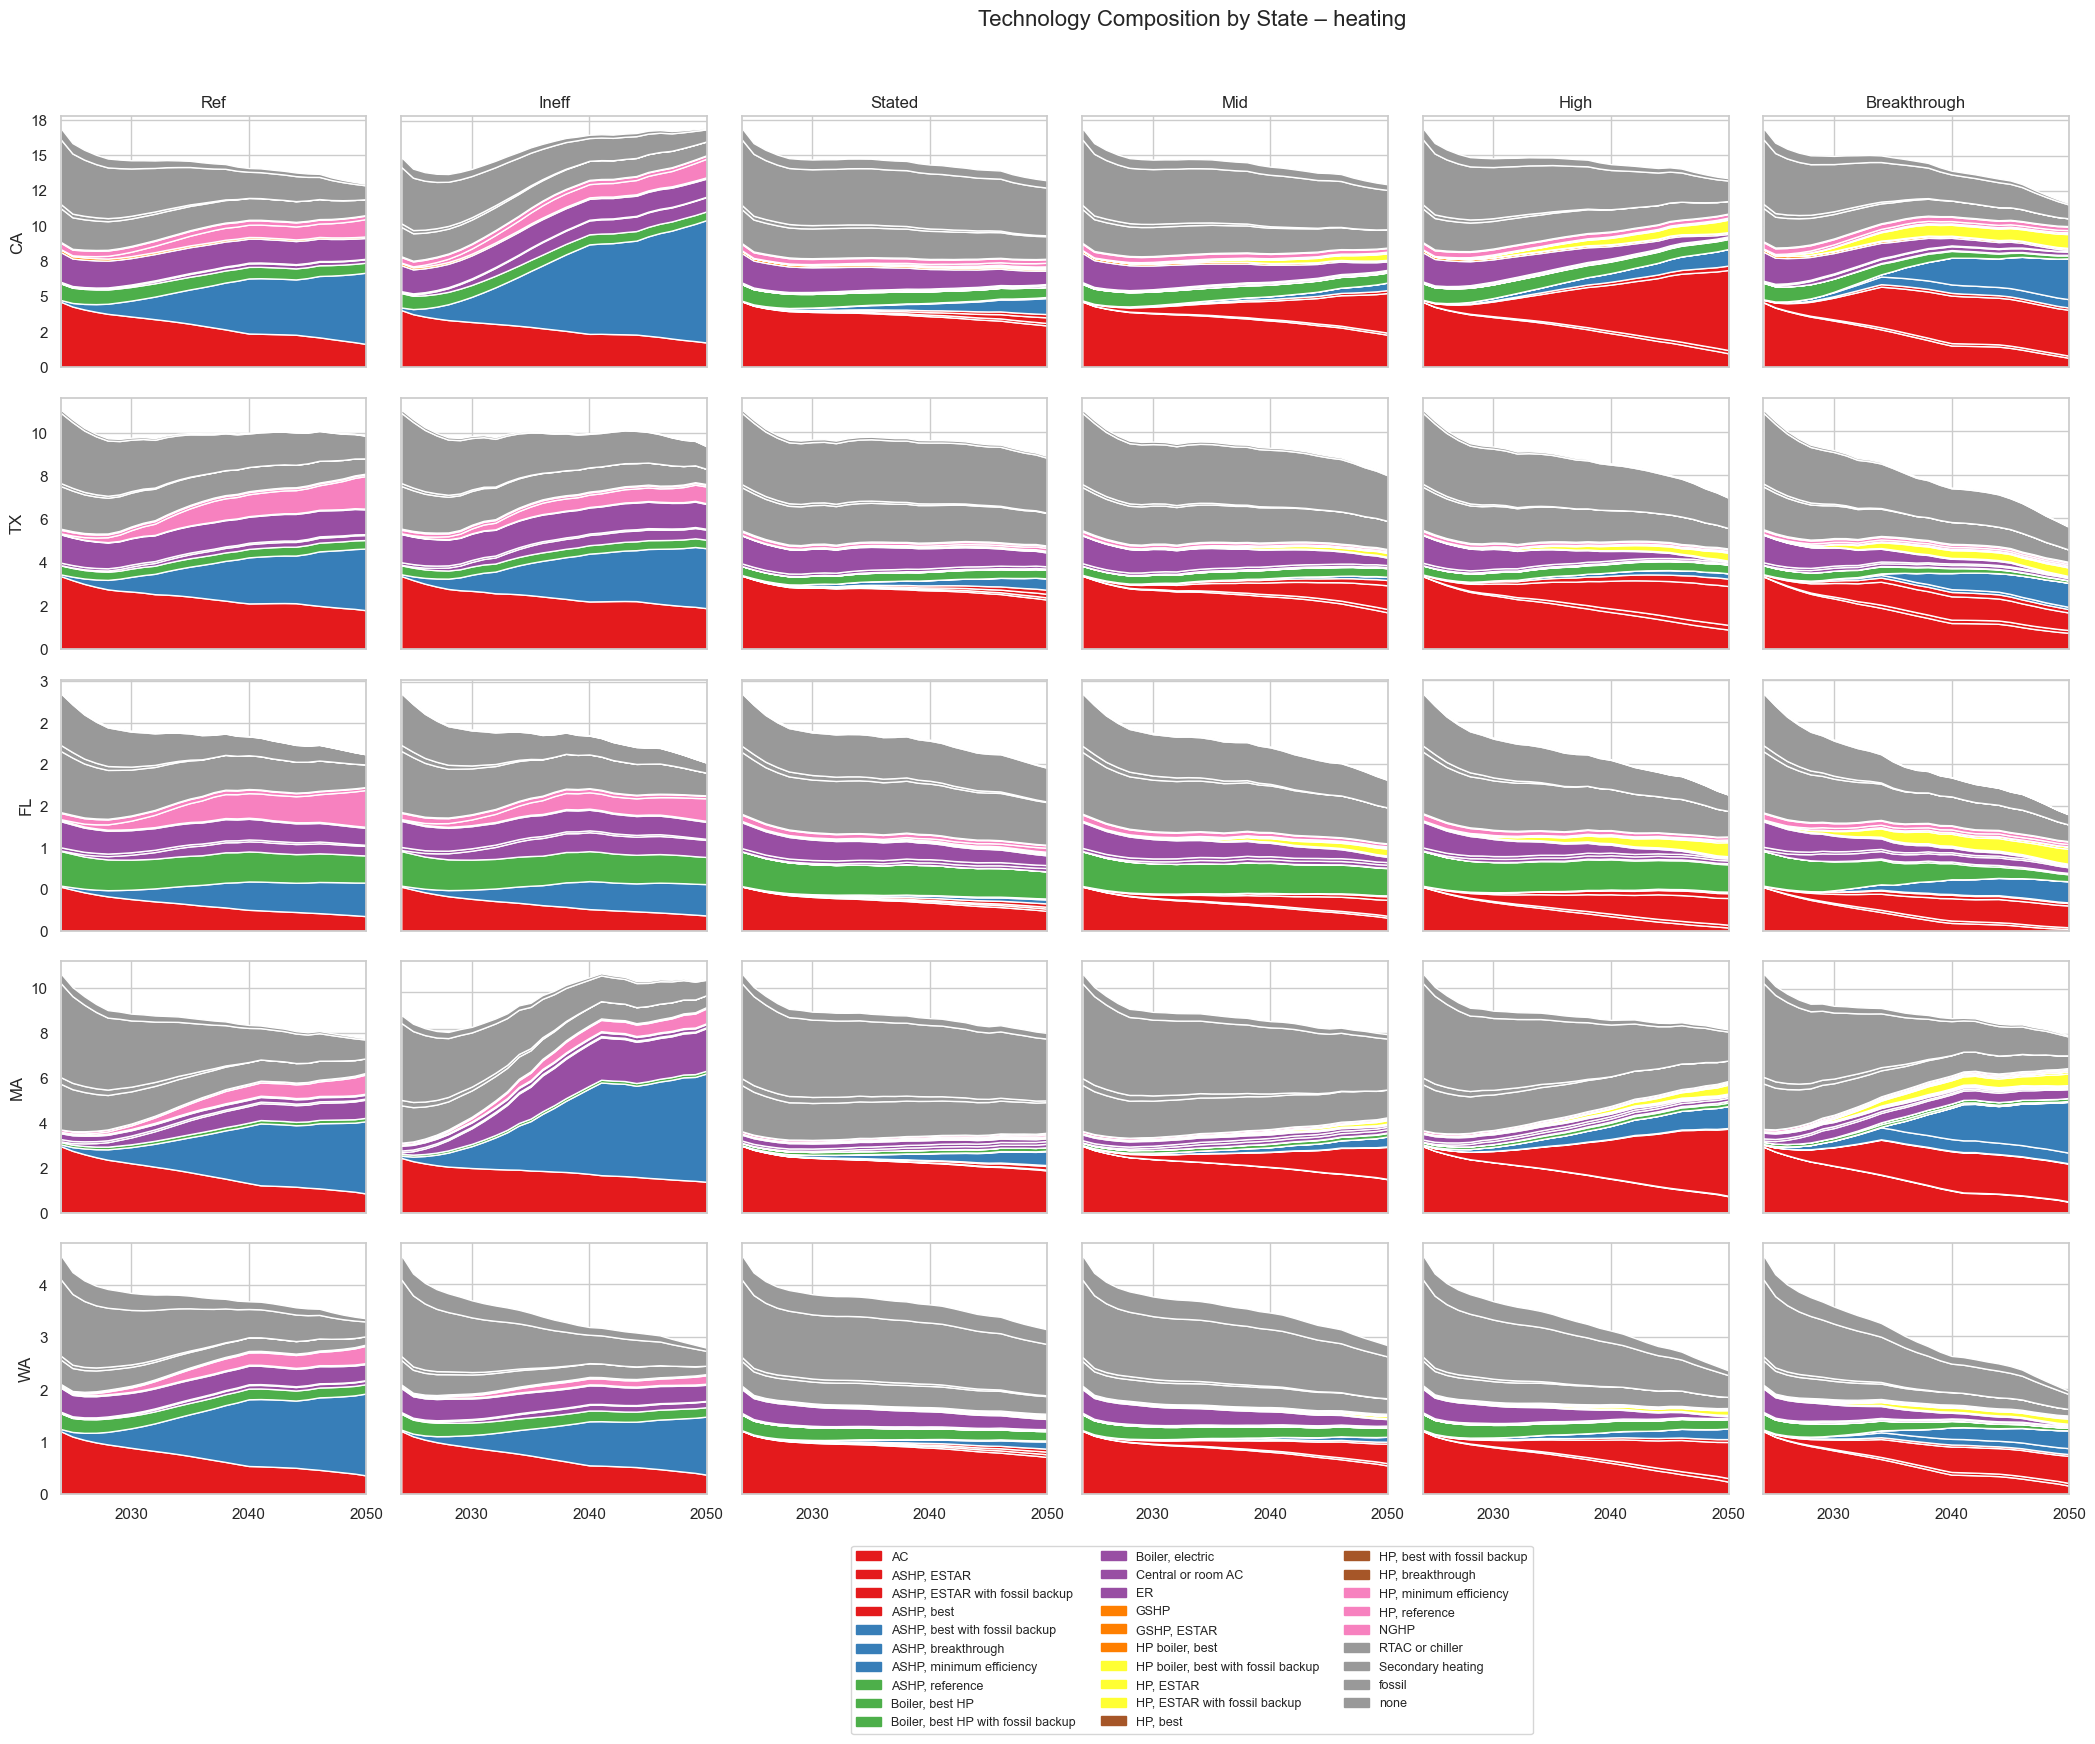

In [265]:
heating_states = ['CA', 'TX', 'FL', 'MA', 'WA']
combined_df_heating = combined_df[combined_df['end_use'].isin(['Heating (Equip.)'])]
plot_enduses_by_states(combined_df_heating,  heating_states,  'heating')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\303169120.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


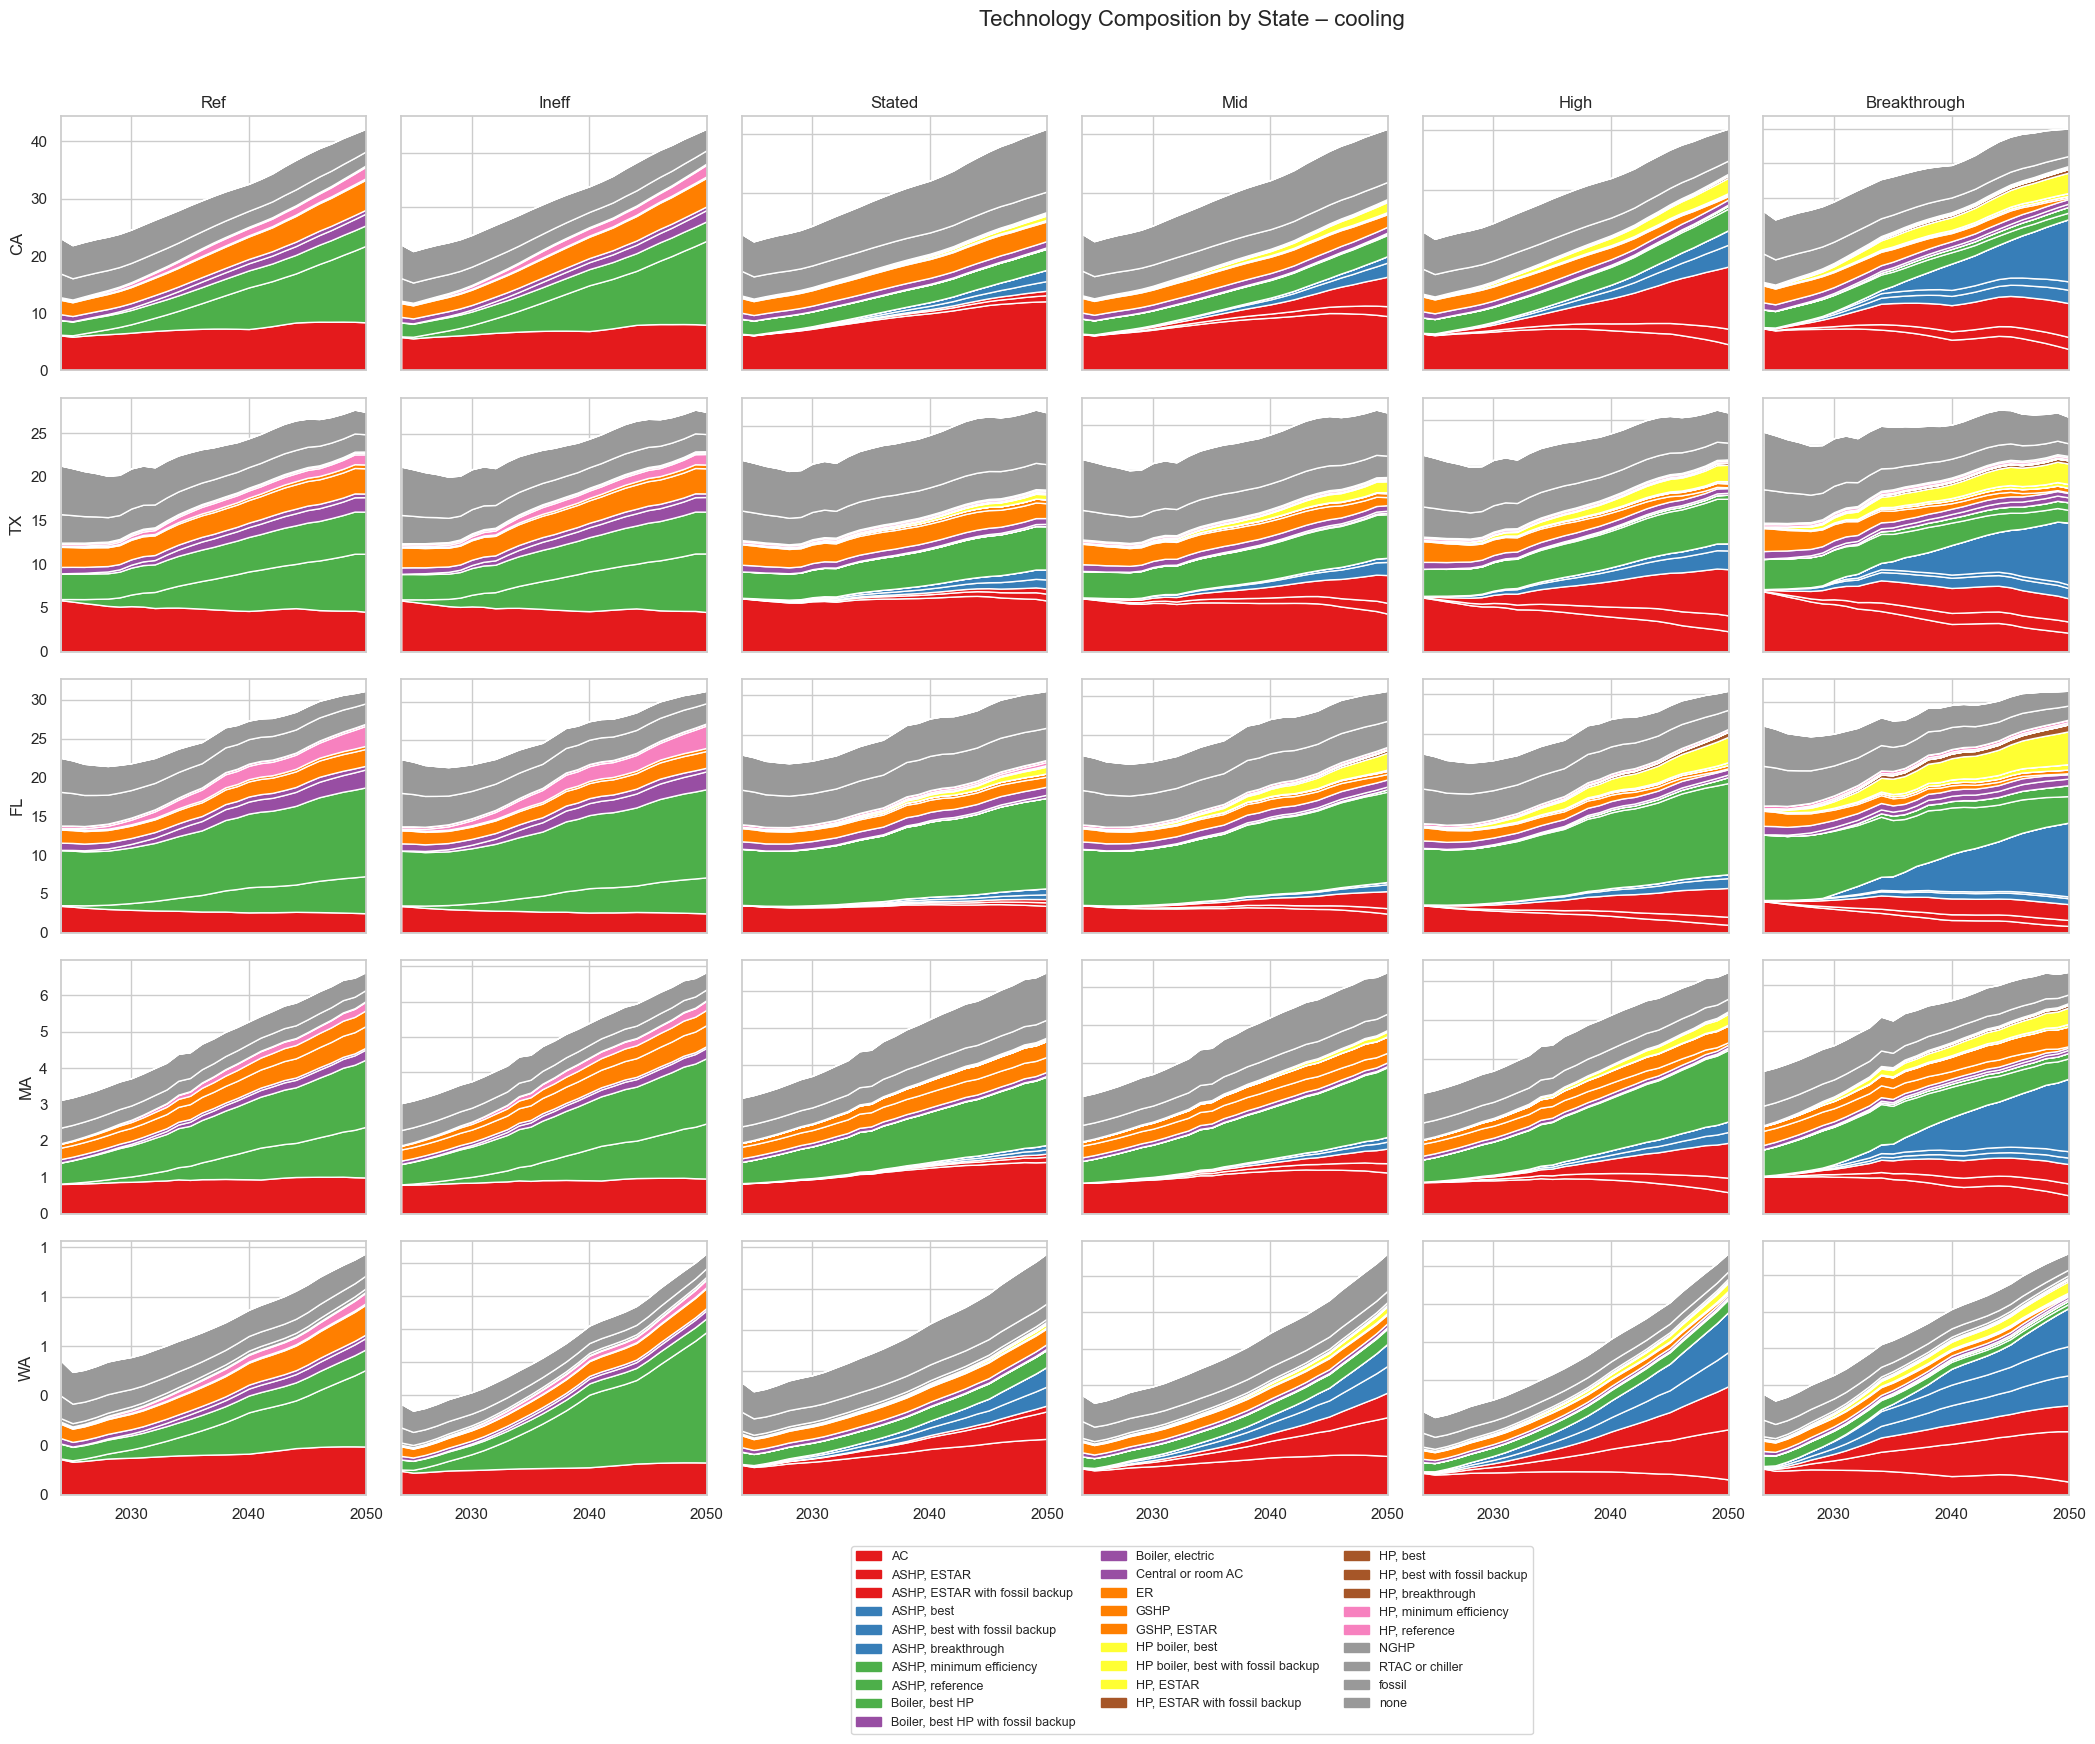

In [266]:
cooling_states = ['CA', 'TX', 'FL', 'MA', 'WA']
combined_df_cooling = combined_df[combined_df['end_use'].isin(['Cooling (Equip.)'])]
plot_enduses_by_states(combined_df_cooling,  cooling_states,  'cooling')

In [268]:
combined_df_heating_saving = combined_df_heating_saving.merge(
    measure_map[['meas', 'measure_desc_simple']],
    on='meas',
    how='left'
)
combined_df_cooling_saving = combined_df_cooling_saving.merge(
    measure_map[['meas', 'measure_desc_simple']],
    on='meas',
    how='left'
)

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3547548738.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


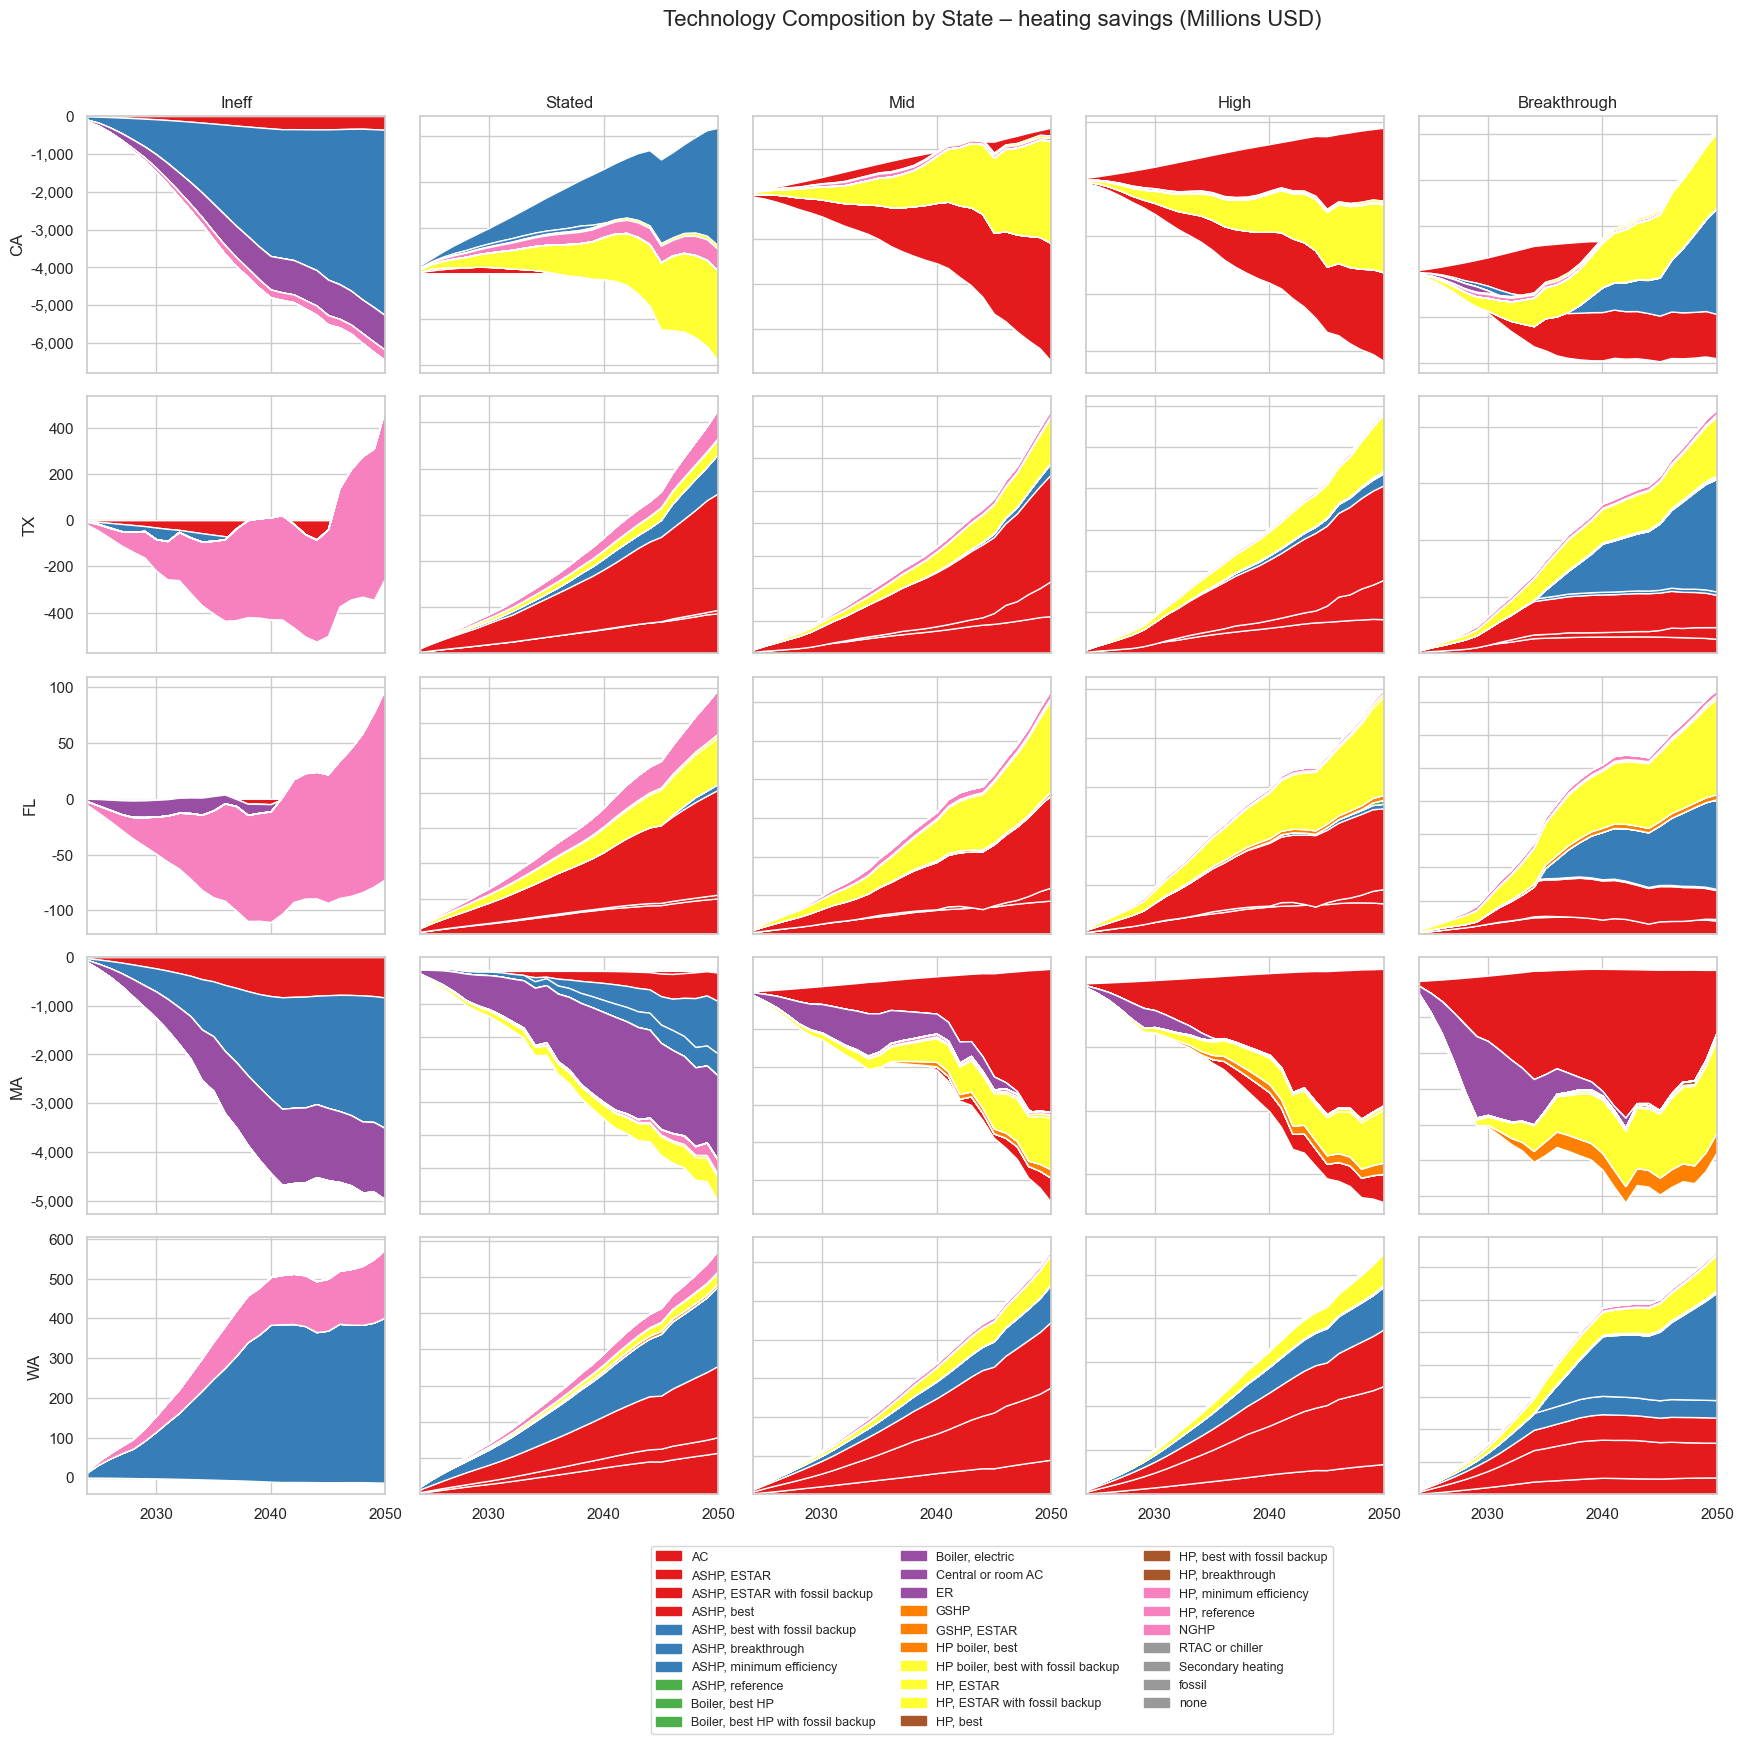

In [277]:
plot_enduses_by_states(combined_df_heating_saving,  heating_states,  'heating savings (Millions USD)')

C:\Users\vapeu\AppData\Local\Temp\ipykernel_10896\3547548738.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set1', len(measures))


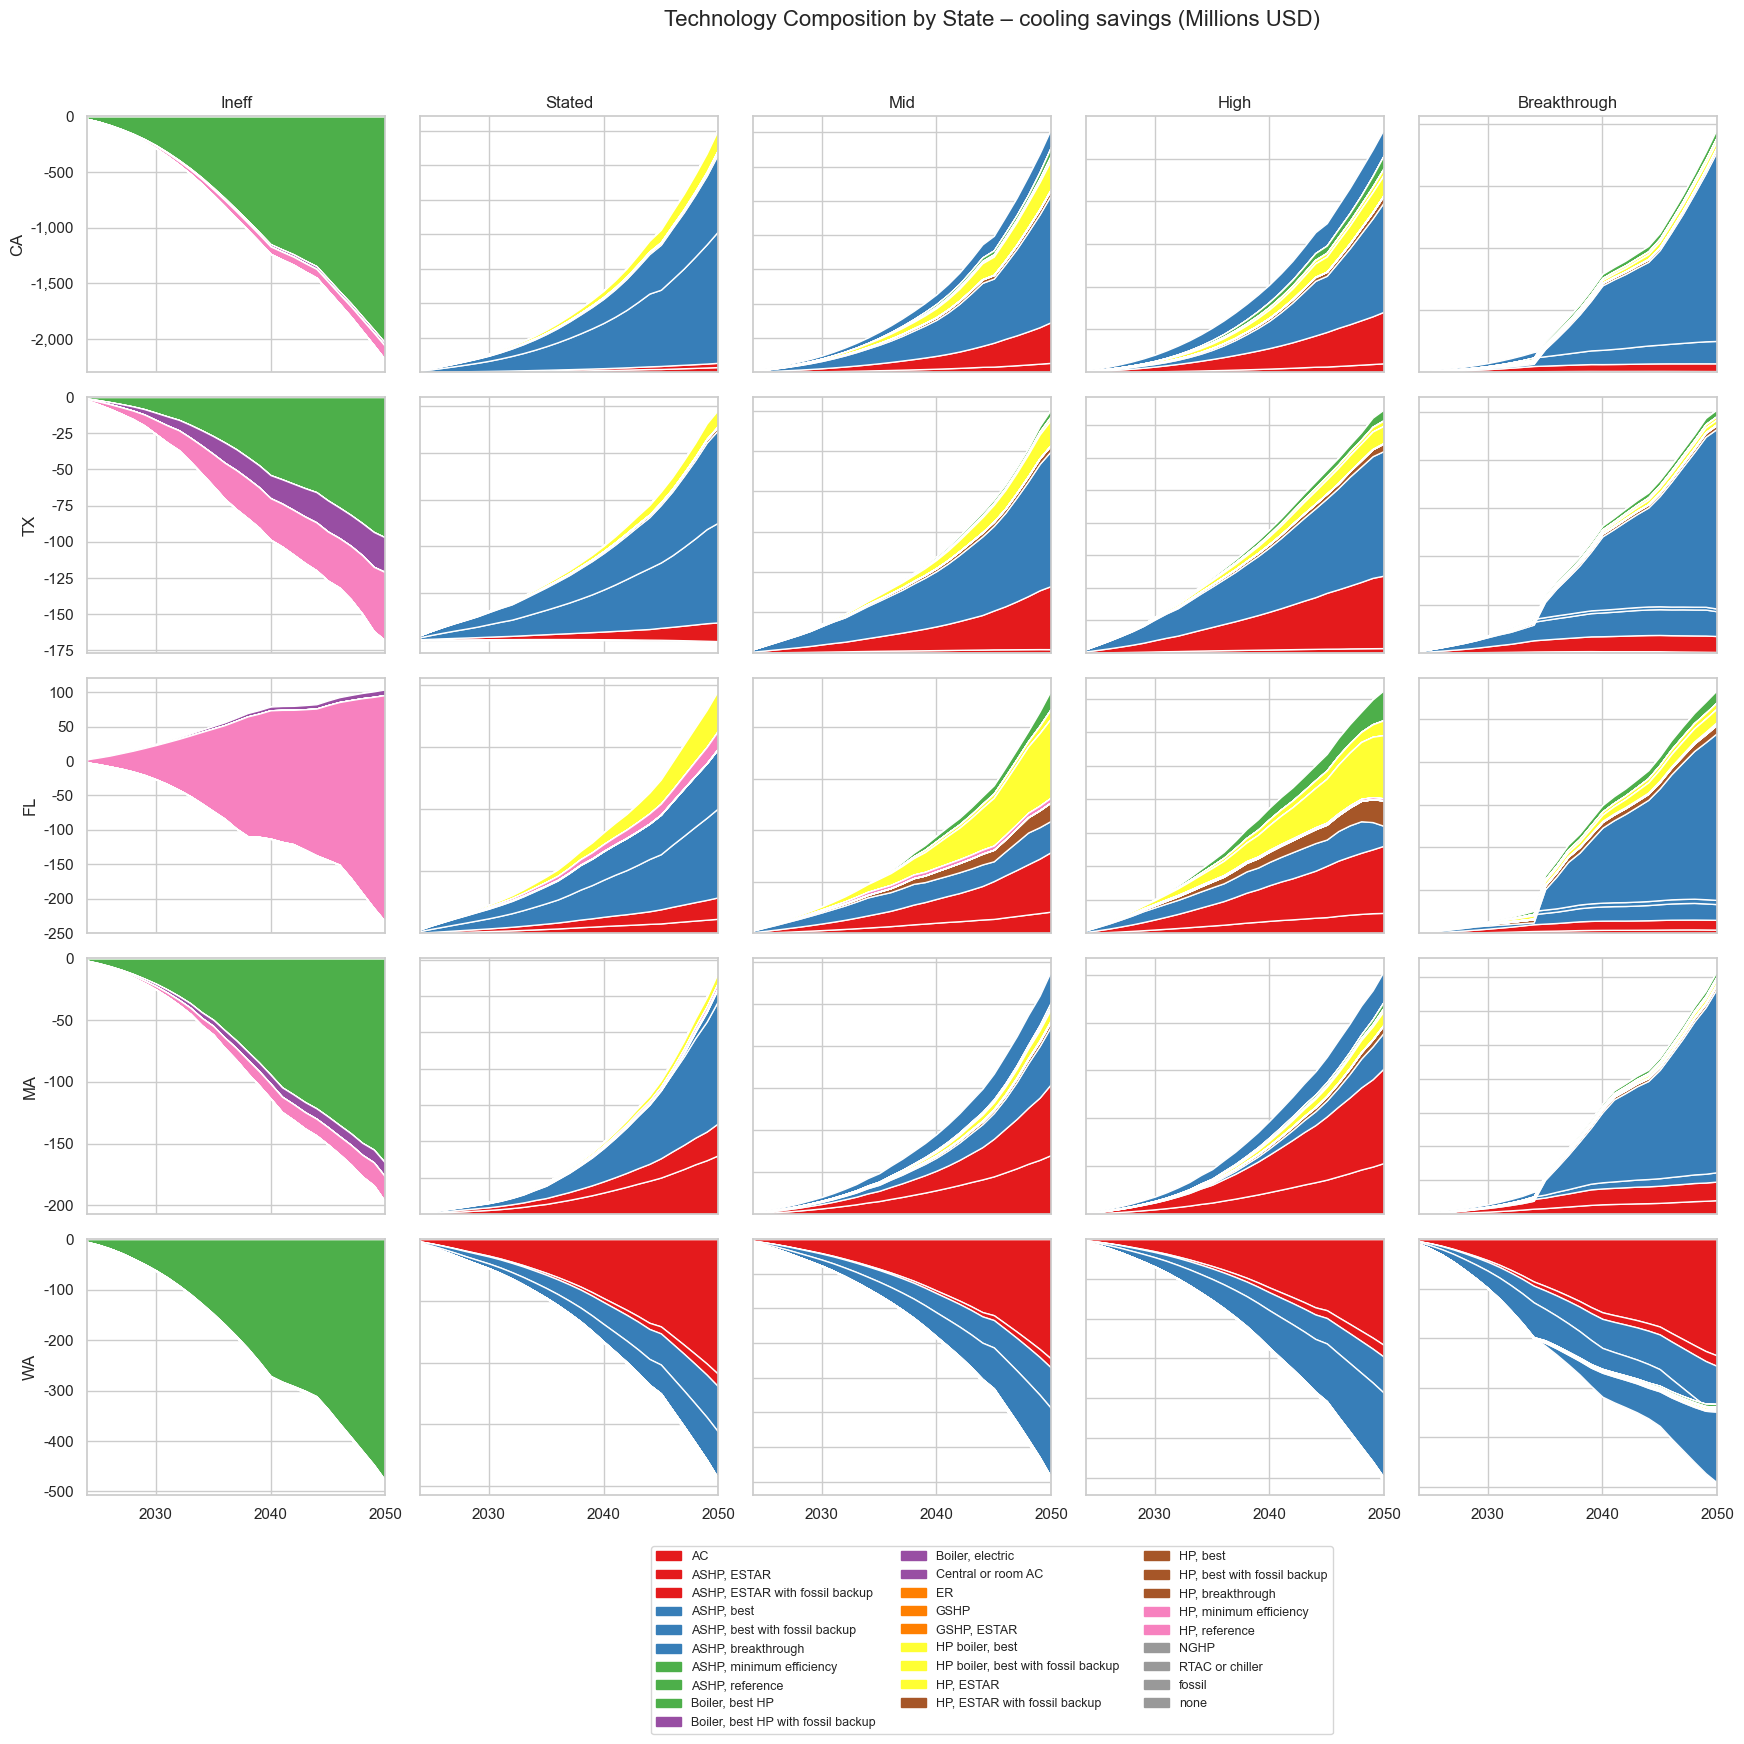

In [278]:
plot_enduses_by_states(combined_df_cooling_saving,  cooling_states,  'cooling savings (Millions USD)')